View the full project at:
https://www.kaggle.com/code/natecekay/spotify-user-data-analysis

#Introduction 
An Analysis of Spotify User Data ##I performed an analysis of Spotify user data to examine trends and insights. The data was collected anonymously using Google Forms. The goal is to help Spotify learn more about customer behaviors and listening habits. The analysis was conducted using R-Studio.

by Nathaniel Cekay

In [1]:
library(tidyverse)
library(dplyr)
library(ggplot2)
library(extrafont)
library(psych)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registering fonts with R


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




In [2]:
library(readr)
Sleep_health_and_lifestyle_dataset <- readxl::read_xlsx("/kaggle/input/spotify-user-behavior-dataset/Spotify_data.xlsx")
head(Sleep_health_and_lifestyle_dataset)

Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,None,Satisfied
35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,None,Both,Satisfied
20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,None,Music,Melody,Night,"Relaxation and stress relief, Social gatherings or parties","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,None,None,None,None,Ok
20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,None,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok
20-35,Male,More than 2 years,Smartphone,Free (ad-supported),No,None,Music,Pop,Night,Uplifting and motivational,Workout session,Others,3,Never,None,None,None,None,Ok


#Data-Cleansing

In [3]:
Spotify_dataclean <- Sleep_health_and_lifestyle_dataset

In [4]:
Spotify_dataclean$preffered_premium_plan <- sub('Rs','',Spotify_dataclean$preffered_premium_plan)
Spotify_dataclean$preffered_premium_plan <- sub('9','.99',Spotify_dataclean$preffered_premium_plan)

In [5]:
Spotify_dataclean$fav_music_genre <- sub('classical','Classical',Spotify_dataclean$fav_music_genre)

In [6]:
Spotify_dataclean$music_lis_frequency <- sub('leisure','Leisure',Spotify_dataclean$music_lis_frequency)

In [7]:
Spotify_dataclean$music_expl_method <- sub('recomm','Recomm',Spotify_dataclean$music_expl_method)

In [8]:
Spotify_data_copy <- Spotify_dataclean %>% 
  rename(preferred_premium_plan = preffered_premium_plan, preferred_listening_content = preferred_listening_content,
         preferred_pod_format = preffered_pod_format, preferred_pod_duration = preffered_pod_duration)

#Data-Visualization

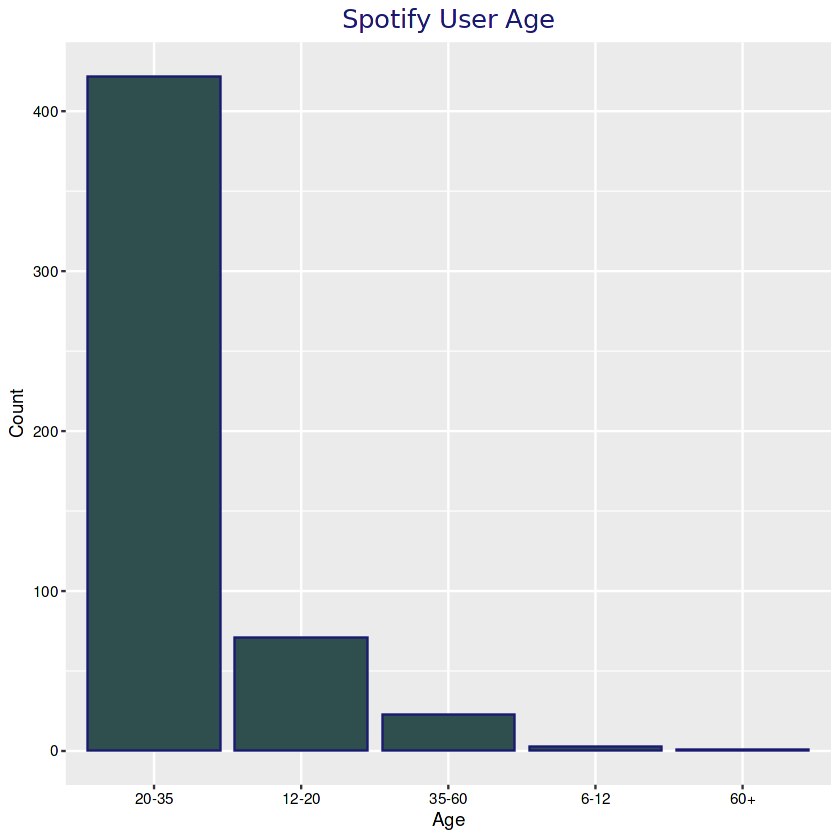

In [9]:
##most of the spotify users were between ages of 20 and 35
ggplot(Spotify_dataclean, aes(x = Age)) +
  geom_bar(aes(x = fct_infreq(Age)), color="midnightblue", fill="darkslategray") +
  labs(title="Spotify User Age") +
  theme(plot.title = element_text(hjust = 0.5, family = "Trebuchet MS", size = 15, colour = "midnightblue")) +
  labs(x = "Age", y = "Count") +
  theme(axis.title.x = element_text(colour = "gray0")) +
  theme(axis.title.y = element_text(colour = "gray0")) +
  theme(axis.text.x = element_text(colour = "gray0")) +
  theme(axis.text.y = element_text(colour = "gray0")) 

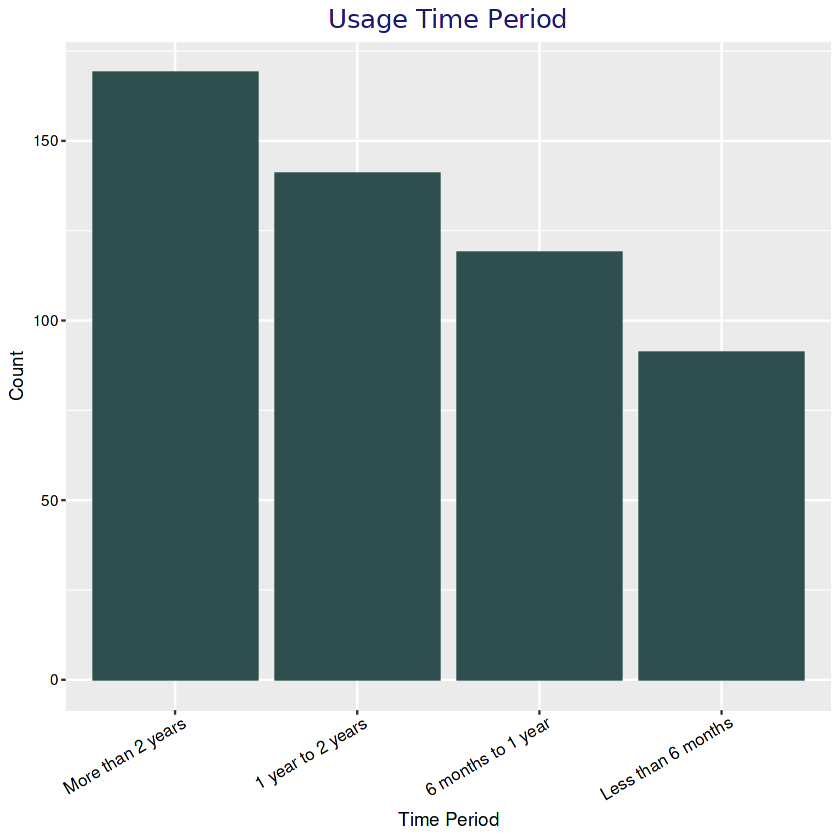

In [10]:
#The majority of users used Spotify for 1 year or more
ggplot(Spotify_dataclean, aes(x = spotify_usage_period)) +
  geom_bar(aes(x = fct_infreq(spotify_usage_period)), color="darkslategray", fill="darkslategray") +
  labs(title="Usage Time Period") +
  theme(plot.title = element_text(hjust = 0.5, family = "Trebuchet MS", size = 15, colour = "midnightblue")) +
  labs(x = "Time Period", y = "Count") +
  theme(axis.title.x = element_text(colour = "gray0")) +
  theme(axis.title.y = element_text(colour = "gray0")) +
  theme(axis.text.x = element_text(colour = "gray0")) +
  theme(axis.text.y = element_text(colour = "gray0")) +
  theme(axis.text.x=element_text(size=10, angle=30,hjust=0.95)) 

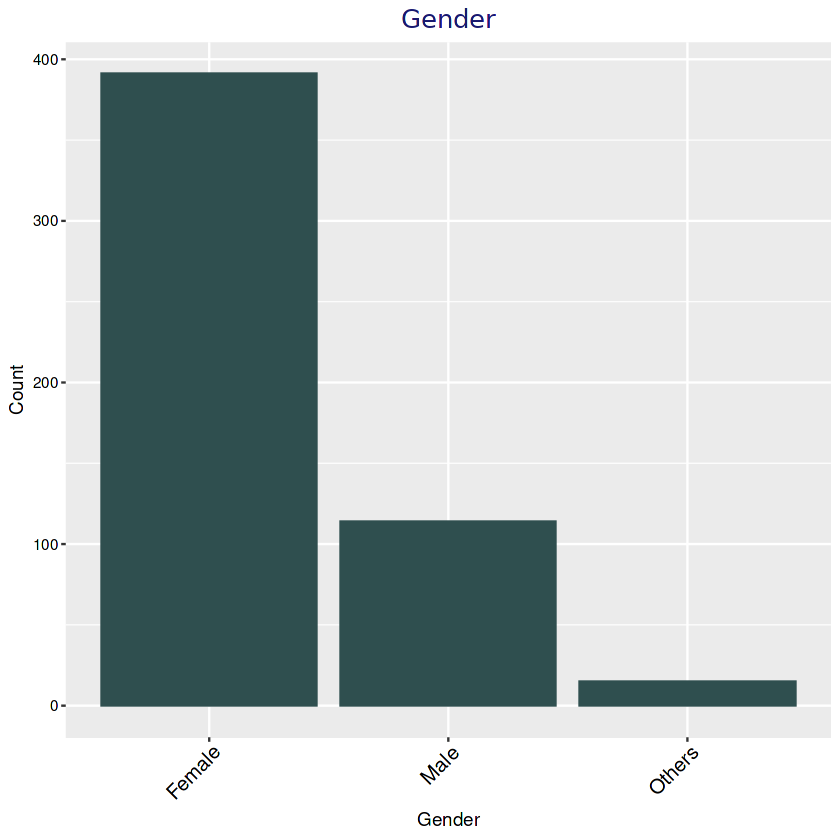

In [11]:
ggplot(Spotify_dataclean, aes(x = Gender)) +
  geom_bar(aes(x = fct_infreq(Gender)), color="darkslategray", fill="darkslategray") +
  labs(title="Gender") +
  theme(plot.title = element_text(hjust = 0.5, family = "Trebuchet MS", size = 15, colour = "midnightblue")) +
  labs(x = "Gender", y = "Count") +
  theme(axis.title.x = element_text(colour = "gray0")) +
  theme(axis.title.y = element_text(colour = "gray0")) +
  theme(axis.text.x = element_text(colour = "gray0")) +
  theme(axis.text.y = element_text(colour = "gray0")) +
  theme(axis.text.x=element_text(size=12, angle=45,hjust=0.95)) 

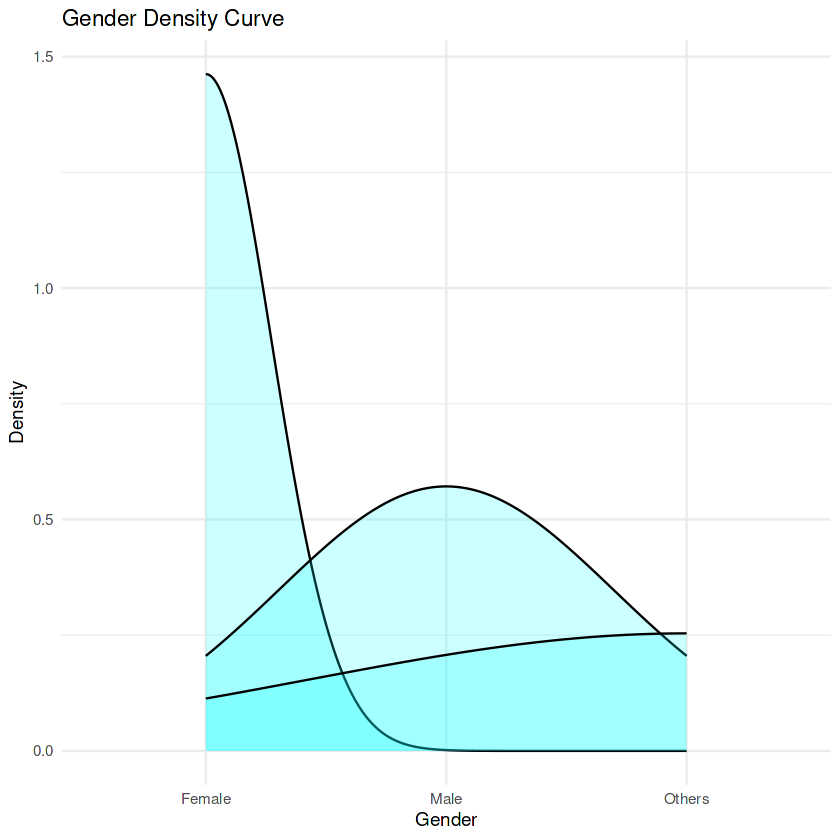

In [12]:
# Density curve
ggplot(Spotify_dataclean, aes(x=Gender)) + 
  geom_density(alpha=.2, fill="CYAN") +
  labs(title="Gender Density Curve", x = "Gender", y = "Density") +
  theme_minimal()

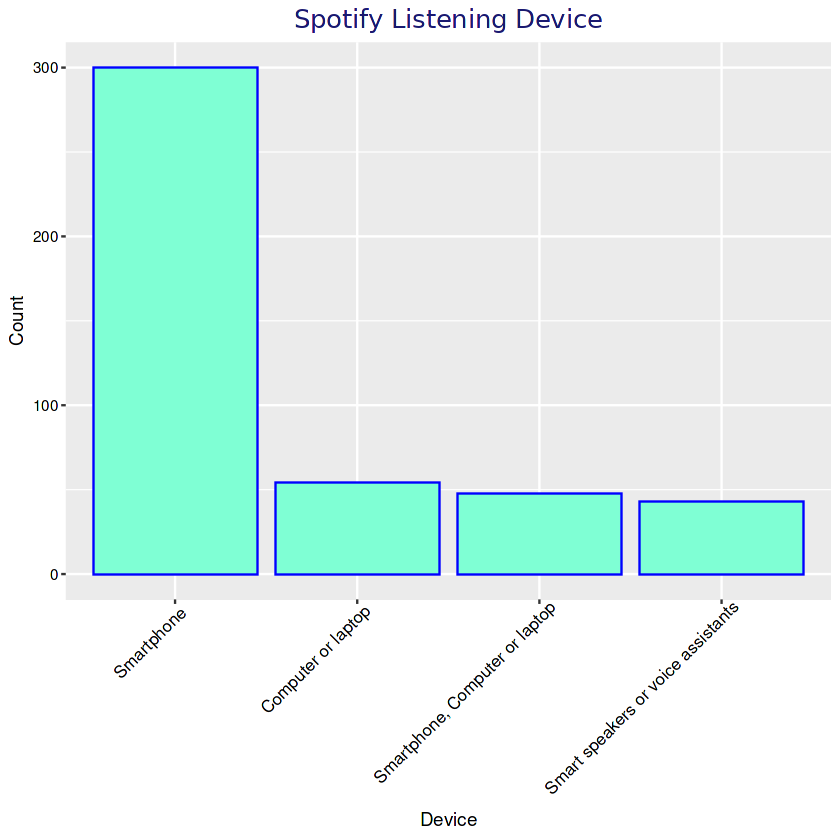

In [13]:
##Most people listened to spotify on their smartphones
spotify_listening_devicefreq <- Spotify_dataclean %>%
  group_by(spotify_listening_device) %>%
  summarize(n = n()) %>%
  arrange(desc(n)) %>%
  head(4)
ggplot(spotify_listening_devicefreq, aes(x = spotify_listening_device)) +
  geom_col(aes(x = fct_rev(fct_reorder(spotify_listening_device, n)), y = n), color="blue", fill="aquamarine1") +
  labs(title="Spotify Listening Device") +
  theme(plot.title = element_text(hjust = 0.5, family = "Trebuchet MS", size = 15, colour = "midnightblue")) +
  labs(x = "Device", y = "Count") +
  theme(axis.title.x = element_text(colour = "gray0")) +
  theme(axis.title.y = element_text(colour = "gray0")) +
  theme(axis.text.x = element_text(colour = "gray0")) +
  theme(axis.text.y = element_text(colour = "gray0")) +
  theme(axis.text.x=element_text(size=10, angle=45,hjust=0.95))

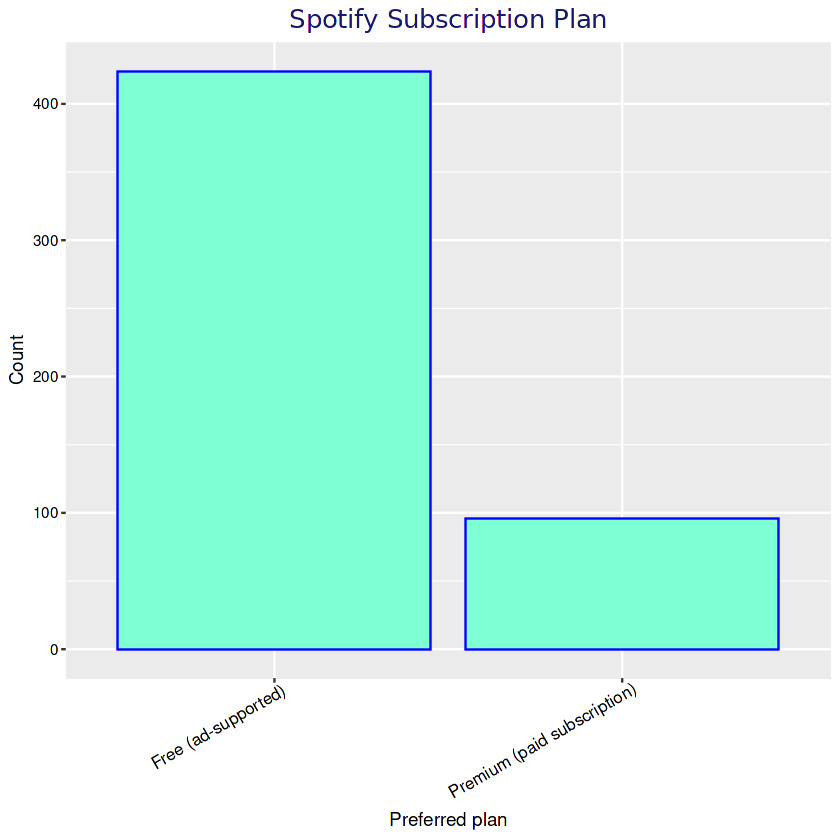

In [14]:
ggplot(Spotify_dataclean, aes(x = spotify_subscription_plan)) +
  geom_bar(aes(x = spotify_subscription_plan), color="blue", fill="aquamarine1") +
  labs(title="Spotify Subscription Plan") +
  theme(plot.title = element_text(hjust = 0.5, family = "Trebuchet MS", size = 15, colour = "midnightblue")) +
  labs(x = "Preferred plan", y = "Count") +
  theme(axis.title.x = element_text(colour = "gray0")) +
  theme(axis.title.y = element_text(colour = "gray0")) +
  theme(axis.text.x = element_text(colour = "gray0")) +
  theme(axis.text.y = element_text(colour = "gray0")) +
  theme(axis.text.x=element_text(size=10, angle=30,hjust=0.95))

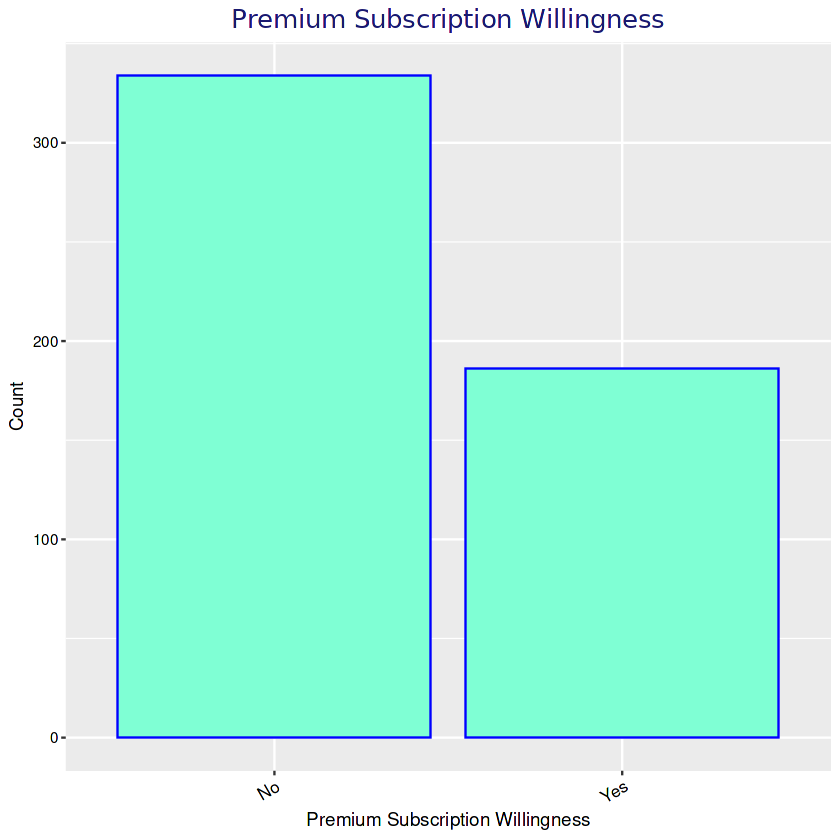

In [15]:
ggplot(Spotify_dataclean, aes(x = premium_sub_willingness)) +
  geom_bar(aes(x = premium_sub_willingness), color="blue", fill="aquamarine1") +
  labs(title="Premium Subscription Willingness") +
  theme(plot.title = element_text(hjust = 0.5, family = "Trebuchet MS", size = 15, colour = "midnightblue")) +
  labs(x = "Premium Subscription Willingness", y = "Count") +
  theme(axis.title.x = element_text(colour = "gray0")) +
  theme(axis.title.y = element_text(colour = "gray0")) +
  theme(axis.text.x = element_text(colour = "gray0")) +
  theme(axis.text.y = element_text(colour = "gray0")) +
  theme(axis.text.x=element_text(size=10, angle=30,hjust=0.95))

In [16]:
head(Spotify_dataclean)

Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan- 17.99/month,Podcast,Melody,Night,Sadness or melancholy,Leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- 11.99/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,None,Satisfied
35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan- 5.99/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,None,Both,Satisfied
20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,None,Music,Melody,Night,"Relaxation and stress relief, Social gatherings or parties","Office hours, Workout session, Leisure time","Recommendations, Playlists",4,Never,None,None,None,None,Ok
20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,None,Music,Melody,Night,Relaxation and stress relief,Leisure time,"Recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok
20-35,Male,More than 2 years,Smartphone,Free (ad-supported),No,None,Music,Pop,Night,Uplifting and motivational,Workout session,Others,3,Never,None,None,None,None,Ok


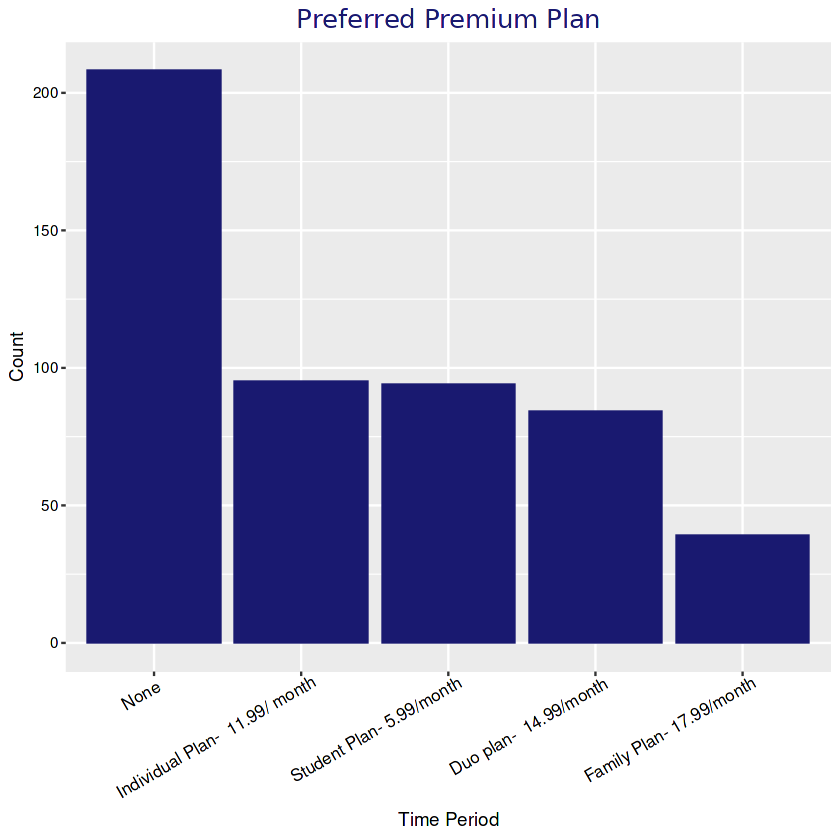

In [17]:
ggplot(Spotify_dataclean, aes(x = preffered_premium_plan)) +
  geom_bar(aes(x = fct_infreq(preffered_premium_plan)), color="midnightblue", fill="midnightblue") +
  labs(title="Preferred Premium Plan") +
  theme(plot.title = element_text(hjust = 0.5, family = "Trebuchet MS", size = 15, colour = "midnightblue")) +
  labs(x = "Time Period", y = "Count") +
  theme(axis.title.x = element_text(colour = "gray0")) +
  theme(axis.title.y = element_text(colour = "gray0")) +
  theme(axis.text.x = element_text(colour = "gray0")) +
  theme(axis.text.y = element_text(colour = "gray0")) +
  theme(axis.text.x=element_text(size=10, angle=30,hjust=0.95)) 

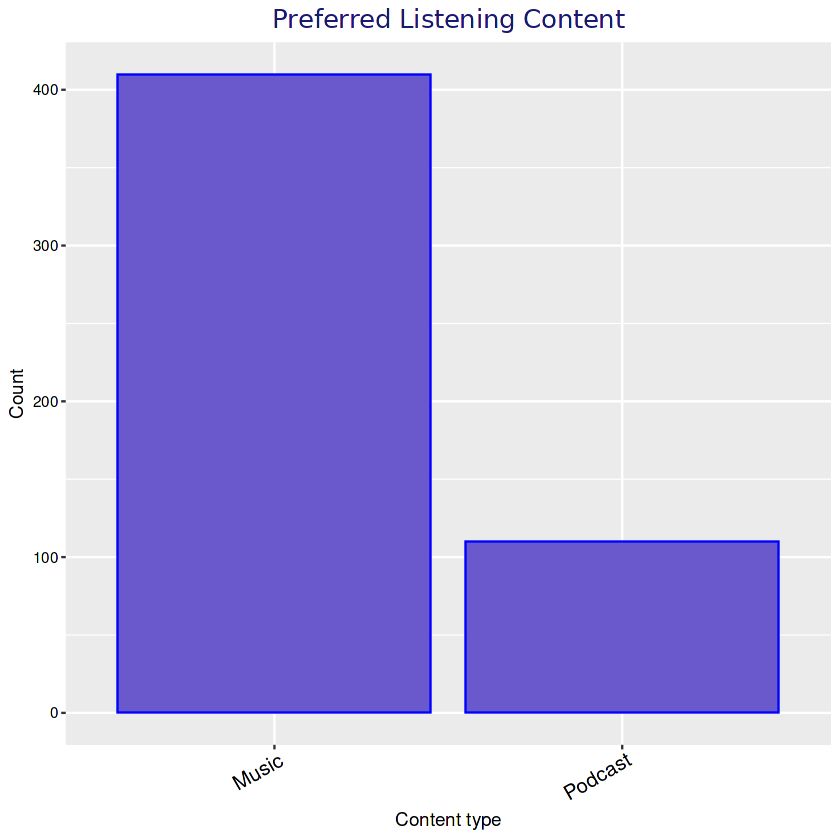

In [18]:
ggplot(Spotify_dataclean, aes(x = preferred_listening_content)) +
  geom_bar(aes(x = fct_infreq(preferred_listening_content)), color="blue", fill="slateblue3") +
  labs(title="Preferred Listening Content") +
  theme(plot.title = element_text(hjust = 0.5, family = "Trebuchet MS", size = 15, colour = "midnightblue")) +
  labs(x = "Content type", y = "Count") +
  theme(axis.title.x = element_text(colour = "gray0")) +
  theme(axis.title.y = element_text(colour = "gray0")) +
  theme(axis.text.x = element_text(colour = "gray0")) +
  theme(axis.text.y = element_text(colour = "gray0")) +
  theme(axis.text.x=element_text(size=12, angle=30,hjust=0.95))

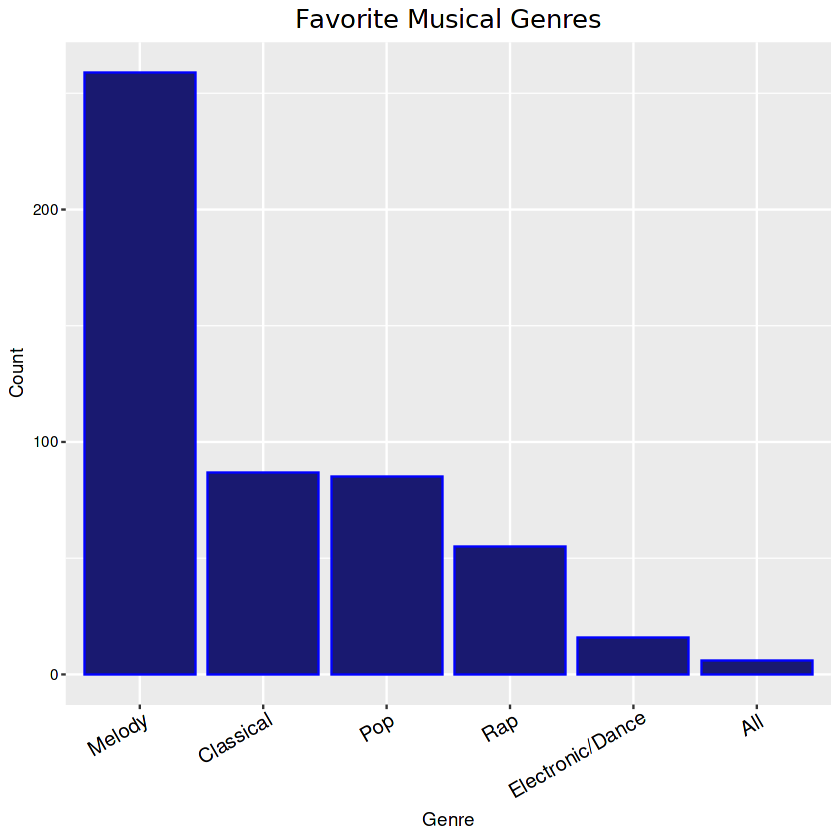

In [19]:
fav_music_genrefreq <- Spotify_dataclean %>%
  group_by(fav_music_genre) %>%
  summarize(n = n()) %>%
  arrange(desc(n)) %>%
  head(6)
ggplot(fav_music_genrefreq, aes(x = fav_music_genre)) +
  geom_col(aes(x = fct_rev(fct_reorder(fav_music_genre, n)), y = n), color="blue", fill="midnightblue") +
  labs(title="Favorite Musical Genres") +
  theme(plot.title = element_text(hjust = 0.5, family = "Trebuchet MS", size = 15, colour = "gray0")) +
  labs(x = "Genre", y = "Count") +
  theme(axis.title.x = element_text(colour = "gray0")) +
  theme(axis.title.y = element_text(colour = "gray0")) +
  theme(axis.text.x = element_text(colour = "gray0")) +
  theme(axis.text.y = element_text(colour = "gray0")) +
  theme(axis.text.x=element_text(size=12, angle=30,hjust=0.95))

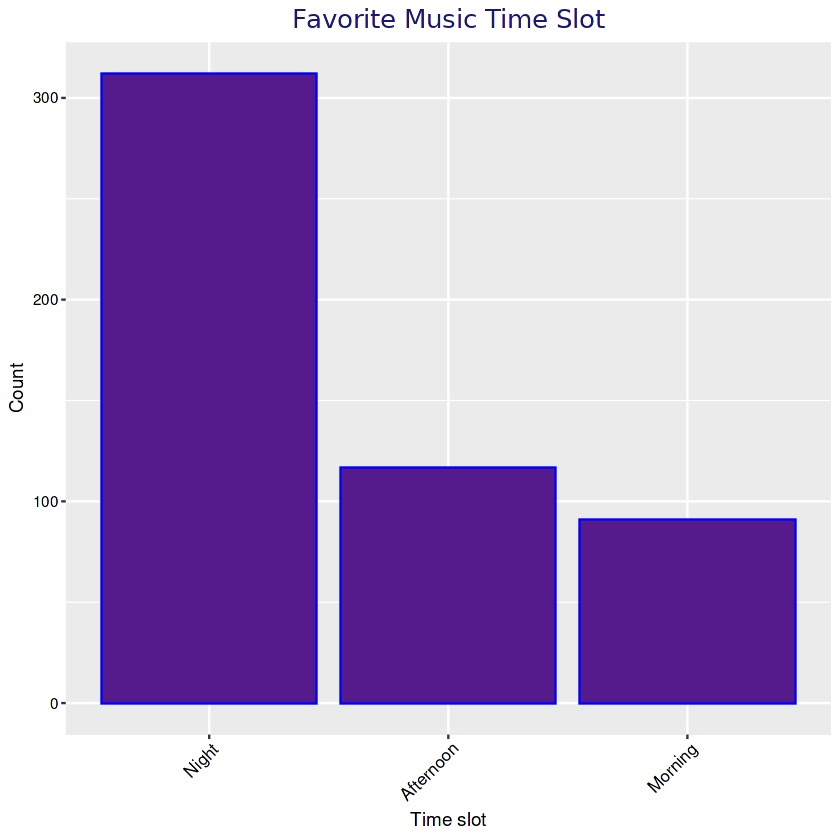

In [20]:
ggplot(Spotify_dataclean, aes(x = music_time_slot)) +
  geom_bar(aes(x = fct_infreq(music_time_slot)), color="blue", fill="purple4") +
  labs(title="Favorite Music Time Slot") +
  theme(plot.title = element_text(hjust = 0.5, family = "Trebuchet MS", size = 15, colour = "midnightblue")) +
  labs(x = "Time slot", y = "Count") +
  theme(axis.title.x = element_text(colour = "gray0")) +
  theme(axis.title.y = element_text(colour = "gray0")) +
  theme(axis.text.x = element_text(colour = "gray0")) +
  theme(axis.text.y = element_text(colour = "gray0")) +
  theme(axis.text.x=element_text(size=10, angle=45,hjust=0.95))

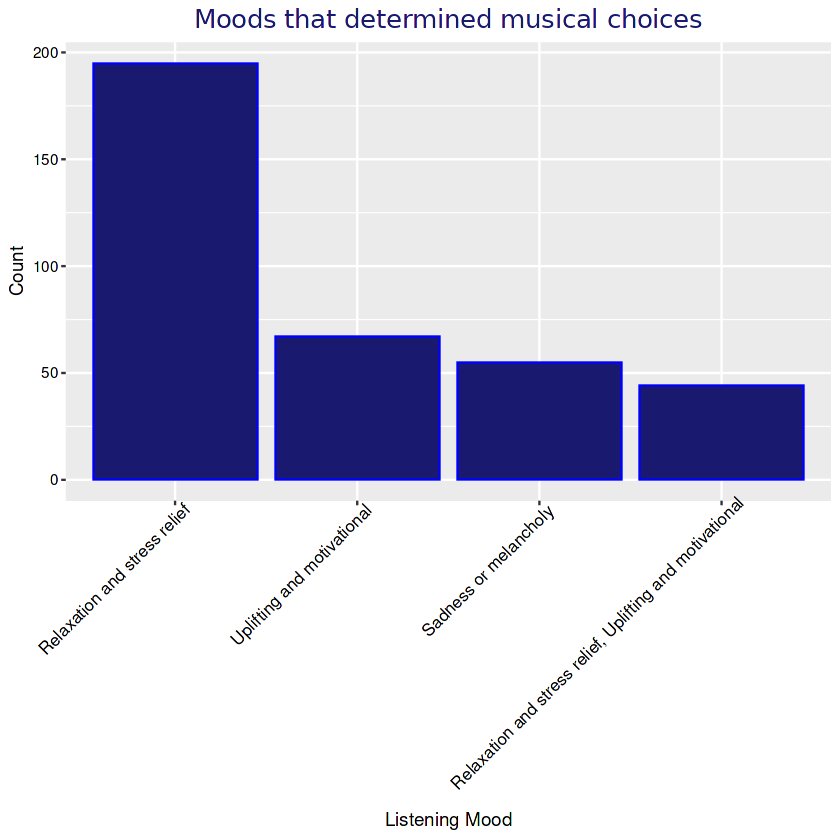

In [21]:
music_Influencial_moodfreq <- Spotify_dataclean %>%
  group_by(music_Influencial_mood) %>%
  summarize(n = n()) %>%
  arrange(desc(n)) %>%
  head(4)
ggplot(music_Influencial_moodfreq, aes(x = music_Influencial_mood)) +
  geom_col(aes(x = fct_rev(fct_reorder(music_Influencial_mood, n)), y = n), color="blue", fill="midnightblue") +
  labs(title="Moods that determined musical choices") +
  theme(plot.title = element_text(hjust = 0.5, family = "Trebuchet MS", size = 15, colour = "midnightblue")) +
  labs(x = "Listening Mood", y = "Count") +
  theme(axis.title.x = element_text(colour = "gray0")) +
  theme(axis.title.y = element_text(colour = "gray0")) +
  theme(axis.text.x = element_text(colour = "gray0")) +
  theme(axis.text.y = element_text(colour = "gray0")) +
  theme(axis.text.x=element_text(size=10, angle=45,hjust=0.95))

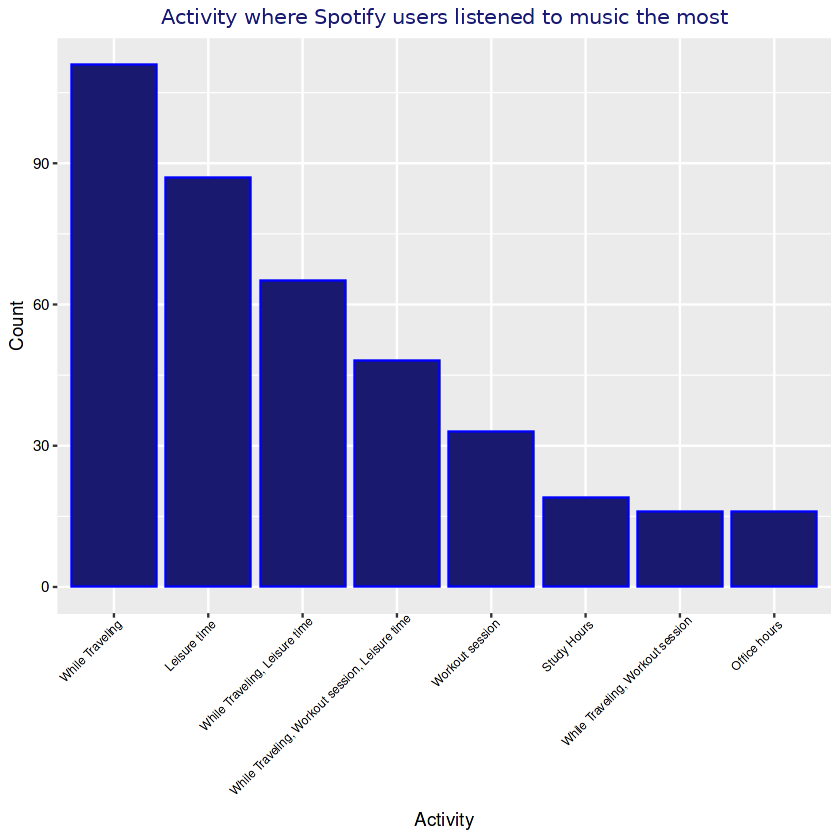

In [22]:
Spotify_data_copylisfreq <- Spotify_dataclean %>%
  group_by(music_lis_frequency) %>%
  summarize(n = n()) %>%
  arrange(desc(n)) %>%
  head(8)
ggplot(Spotify_data_copylisfreq) +
  geom_col(aes(x = fct_rev(fct_reorder(music_lis_frequency, n)), y = n), color="blue", fill="midnightblue") +
  labs(title="Activity where Spotify users listened to music the most") +
  theme(plot.title = element_text(hjust = 0.5, family = "Trebuchet MS", size = 12, colour = "midnightblue")) +
  labs(x = "Activity", y = "Count") +
  theme(axis.title.x = element_text(colour = "gray0")) +
  theme(axis.title.y = element_text(colour = "gray0")) +
  theme(axis.text.x = element_text(colour = "gray0")) +
  theme(axis.text.y = element_text(colour = "gray0")) +
  theme(axis.text.x=element_text(size=7, angle=45,hjust=0.95))


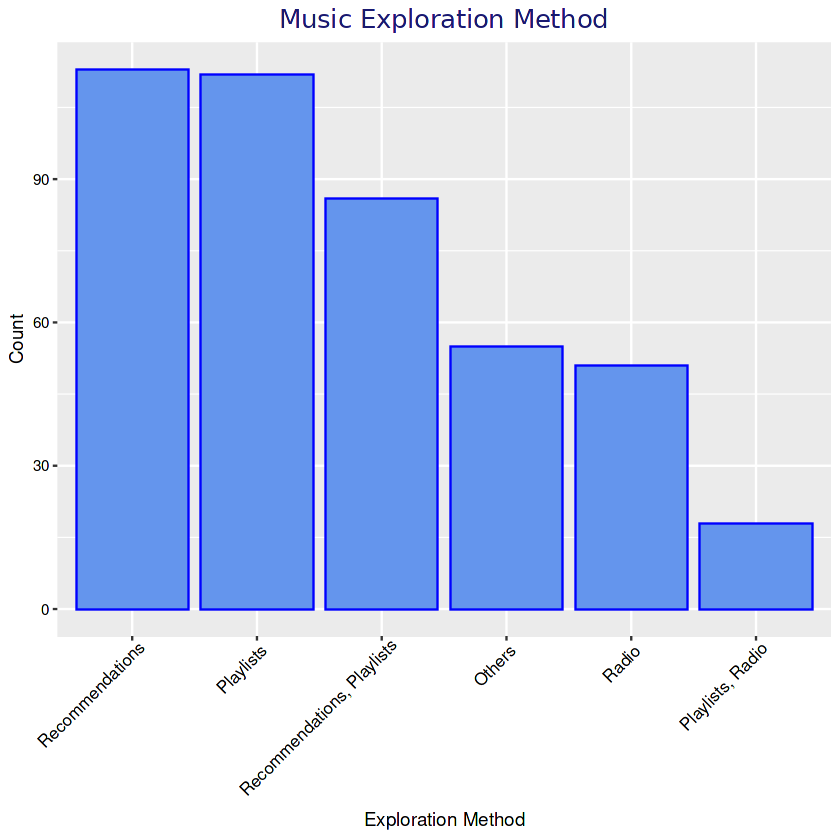

In [23]:
music_expl_methodfreq <- Spotify_dataclean %>%
  group_by(music_expl_method) %>%
  summarize(n = n()) %>%
  arrange(desc(n)) %>%
  head(6)
ggplot(music_expl_methodfreq) +
  geom_col(aes(x = fct_rev(fct_reorder(music_expl_method, n)), y = n), color="blue", fill="cornflowerblue") +
  labs(title="Music Exploration Method") +
  theme(plot.title = element_text(hjust = 0.5, family = "Trebuchet MS", size = 15, colour = "midnightblue")) +
  labs(x = "Exploration Method", y = "Count") +
  theme(axis.title.x = element_text(colour = "gray0")) +
  theme(axis.title.y = element_text(colour = "gray0")) +
  theme(axis.text.x = element_text(colour = "gray0")) +
  theme(axis.text.y = element_text(colour = "gray0")) +
  theme(axis.text.x=element_text(size=10, angle=45,hjust=0.95))


In [24]:
##The recordings had an average rating of 3.5 stars
describe(Spotify_dataclean$music_recc_rating)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,520,3.503846,0.9795523,3.5,3.538462,0.7413,1,5,4,-0.2562583,-0.3047154,0.04295621


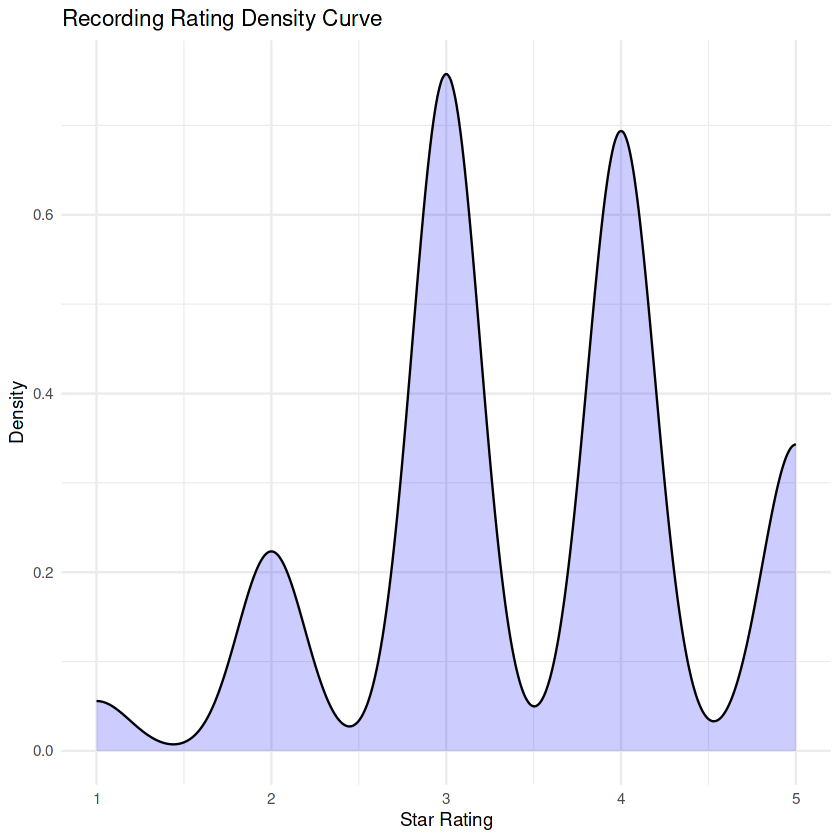

In [25]:
# Density curve
ggplot(Spotify_dataclean, aes(x=music_recc_rating)) + 
  geom_density(alpha=.2, fill="BLUE") +
  labs(title="Recording Rating Density Curve", x = "Star Rating", y = "Density") +
  theme_minimal()

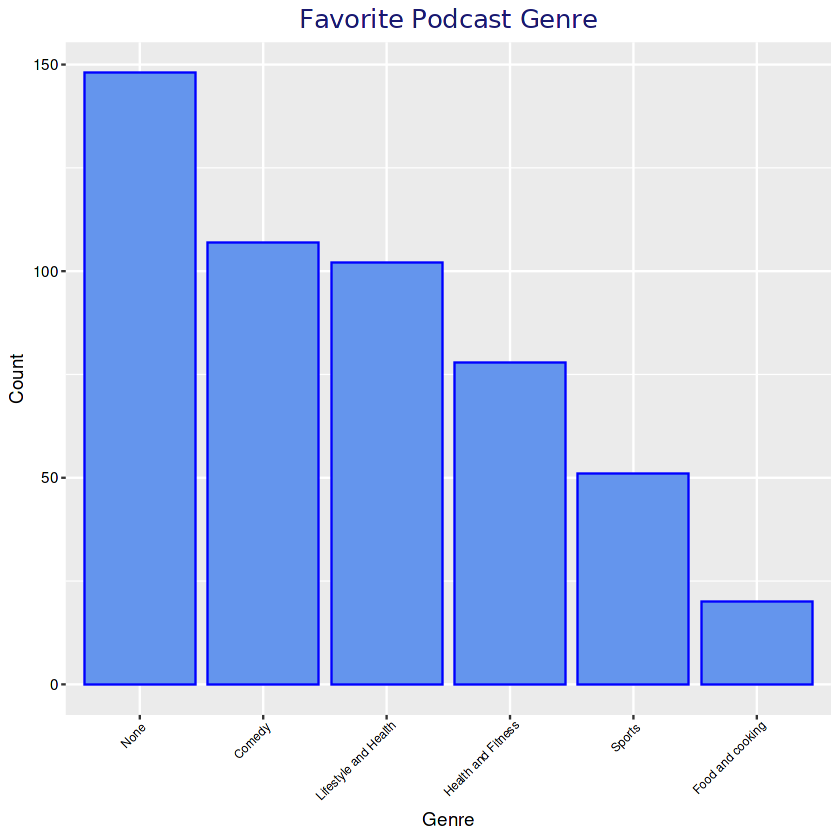

In [26]:
fav_pod_genrefreq <- Spotify_dataclean %>%
  group_by(fav_pod_genre) %>%
  summarize(n = n()) %>%
  arrange(desc(n)) %>%
  head(6)

ggplot(fav_pod_genrefreq) +
  geom_col(aes(x = fct_rev(fct_reorder(fav_pod_genre, n)), y = n), color="blue", fill="cornflowerblue") +
  labs(title="Favorite Podcast Genre") +
  theme(plot.title = element_text(hjust = 0.5, family = "Trebuchet MS", size = 15, colour = "midnightblue")) +
  labs(x = "Genre", y = "Count") +
  theme(axis.title.x = element_text(colour = "gray0")) +
  theme(axis.title.y = element_text(colour = "gray0")) +
  theme(axis.text.x = element_text(colour = "gray0")) +
  theme(axis.text.y = element_text(colour = "gray0")) +
  theme(axis.text.x=element_text(size=7, angle=45,hjust=0.95))
